# Project in the course DD2424 at KTH, using ALEXNET on the 17 category Oxford flower datasets. 
#Author of the code: Badi Mirzai

In [2]:
!pip install -q -U tensorflow_hub
!pip install -q tfds-nightly tensorflow matplotlib

     |████████████████████████████████| 4.0 MB 5.3 MB/s 


#Install tflearn only for the 17 label images (will mess up for th 102 dataset)


In [3]:
!pip install tflearn

     |████████████████████████████████| 107 kB 5.4 MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-py3-none-any.whl size=127299 sha256=d99a00df02b8452146a4d420fbb7d086bb75fbcfc8e0893f22343b503ae46b1c
  Stored in directory: /root/.cache/pip/wheels/5f/14/2e/1d8e28cc47a5a931a2fb82438c9e37ef9246cc6a3774520271
Successfully built tflearn


In [4]:
import tensorflow as tf

In [5]:
import tensorflow as tf # for 102
#tf.compat.v1.enable_eager_execution()
import matplotlib.pyplot as plt # 102
from tensorflow.keras import datasets, layers, models, losses

import tflearn.datasets.oxflower17 as oxflower17
import tflearn.datasets.cifar100 as cifar100

import tensorflow_hub as hub

from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator

import tensorflow_datasets as tfds 

import numpy as np # 102

Instructions for updating:
non-resource variables are not supported in the long term


#Import 17 flower category dataset

In [6]:
x, y = oxflower17.load_data()

#Split train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle = True)

#x, y , dataset_info = tfds.load('oxflower17', with_info=True, as_supervised=True)
#pre-processing and data augmentation
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

100.0% 60276736 / 60270631


Succesfully downloaded 17flowers.tgz 60270631 bytes.
File Extracted
Starting to parse images...
Parsing Done!


#Mount google drive

In [6]:
"""
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
"""

'\nfrom google.colab import drive\ndrive.mount("/content/drive", force_remount=True)\n'

In [14]:


# taken from https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/alexnet_in_keras.ipynb#scrollTo=dOidSBLdgIcj
model = models.Sequential()
#model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))

model.add(layers.Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(256, kernel_size=(5, 5), activation='relu'))
#model.add(layers.Conv2D(32, kernel_size=(5, 5), activation='relu'))

model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.BatchNormalization())
#model.add(layers.Dropout(0.4))
model.add(layers.Dense(4096, activation='relu'))
#model.add(layers.Dropout(0.4))
model.add(layers.BatchNormalization())

model.add(layers.Dense(17, activation='softmax'))
#model.add(layers.Dense(102, activation='softmax'))
model.summary()




Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 22, 22, 256)       614656    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 10, 10, 256)       1024      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 8, 256)        

In [15]:
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

#Train model



In [16]:
#Without data augmentation
history = model.fit(x_train, y_train, batch_size=64, epochs=25, validation_data=(x_test, y_test))

#for data augmentation
#history = model.fit_generator(img_gen.flow(x_train*255, y_train, batch_size = 64),
#                                      steps_per_epoch = len(x_train)/64, validation_data = (x_test,y_test), epochs = 25)

Train on 1088 samples, validate on 272 samples
Epoch 1/25
1088/1088 [==============================] - ETA: 0s - loss: 5.9703 - acc: 0.2325

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2470: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1088/1088 [==============================] - 4s 3ms/sample - loss: 5.9703 - acc: 0.2325 - val_loss: 21.3060 - val_acc: 0.1066
Epoch 2/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.3001 - acc: 0.3640 - val_loss: 12.0112 - val_acc: 0.0625
Epoch 3/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 2.0371 - acc: 0.3998 - val_loss: 5.3078 - val_acc: 0.0846
Epoch 4/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.8926 - acc: 0.4412 - val_loss: 3.1827 - val_acc: 0.1581
Epoch 5/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.6996 - acc: 0.4715 - val_loss: 2.8384 - val_acc: 0.1618
Epoch 6/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.6704 - acc: 0.4991 - val_loss: 2.9858 - val_acc: 0.1397
Epoch 7/25
1088/1088 [==============================] - 2s 2ms/sample - loss: 1.4811 - acc: 0.5248 - val_loss: 3.9487 - val_acc: 0.1434
Epoch 8/25
1088/1088 [==============================] - 2

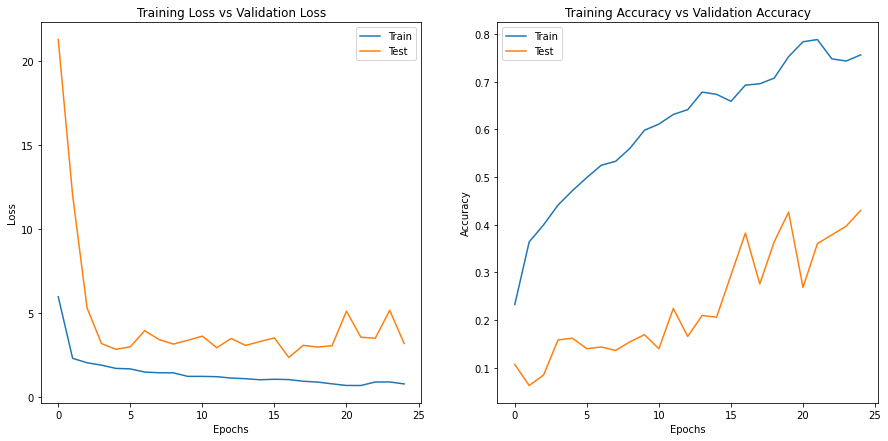

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15,7))

axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
#axs[0].legend(['Train', 'Validation'])
axs[0].legend(['Train', 'Test'])

axs[1].plot(history.history['acc'])
axs[1].plot(history.history['val_acc'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
#axs[1].legend(['Train', 'Validation'])
axs[1].legend(['Train', 'Test'])

#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/adam base model'

#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/dropout fully layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/dropout conv layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/dropout all layers'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/batchnorm'
#images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/data augmentation'
images_dir = '/content/drive/MyDrive/Deep learning project files/results 17 category/data augmentation with dropout'
#plt.savefig(f"{images_dir}/training plots_test_label.pdf")
#plt.savefig(f"{images_dir}/training plots.pdf")



In [18]:
model.evaluate(x_test, y_test)

[3.187962812535903, 0.43014705]